In [2]:
import tensorflow as tf
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [3]:
tf.reset_default_graph()
file = (
    '/home/vitchyr/git/rllab-rail/railrl/data/local/'
    'dev-3-20-bptt-ddpg-analyze/'
    'dev-3-20-bptt-ddpg-analyze_2017_03_20_15_52_34_0000--s-0/'
    'params.pkl'
)
sess = tf.InteractiveSession()
data = joblib.load(file)
if 'policy' in data:
    policy = data['policy']
else:
    qf = data['optimizable_qfunction']
    policy = qf.implicit_policy
env = data['env']
print("Policy loaded")

Instructions for updating:
Use `tf.variables_initializer` instead.


Instructions for updating:
Use `tf.variables_initializer` instead.


Policy loaded


In [4]:
qf = data['qf']

In [5]:
def qf_output(sess, qf, state, action):
    return sess.run(
        qf.output,
        {
            qf.action_input: action,
            qf.observation_input: state,
        }
    )

def policy_output(sess, policy, state):
    return sess.run(
        policy.output,
        {
            policy.observation_input: state,
        }
    )

In [6]:
print(qf.action_input)
print(qf.observation_input)

(<tf.Tensor 'critic/action_input_0:0' shape=(?, 3) dtype=float32>, <tf.Tensor 'critic/action_input_1:0' shape=(?, 20) dtype=float32>)
(<tf.Tensor 'critic/observation_input_0:0' shape=(?, 3) dtype=float32>, <tf.Tensor 'critic/observation_input_1:0' shape=(?, 20) dtype=float32>)


In [7]:
obs = np.zeros((1, 3))
obs[0, 2] = 1
mem = np.zeros((1, 20))
state = (obs, mem)
action = policy_output(sess, policy, state)
value = qf_output(sess, qf, state, action)

obs_2 = np.zeros((1, 3))
obs_2[0, 1] = 1
mem_2 = np.zeros((1, 20))
state_2 = (obs_2, mem_2)
action_2 = policy_output(sess, policy, state_2)
value_2 = qf_output(sess, qf, state_2, action_2)

print(value)
print(value_2)

[[ 1.08041024]]
[[ 1.15124011]]


In [8]:
value_wrong_s1_a2 = qf_output(sess, qf, state, action_2)
value_wrong_s2_a1 = qf_output(sess, qf, state_2, action)
print(value_wrong_s1_a2)
print(value_wrong_s2_a1)

[[ 0.57207]]
[[ 0.84154409]]


In [9]:
n_values = 2
n_hidden = 20
def onehot(i, n_values):
    onehot = np.zeros((1, n_values))
    onehot[0, i] = 1
    return onehot

def init_state(i, n_values, n_hidden):
    obs = onehot(i+1, n_values+1)
    mem = np.zeros((1, n_hidden))
    return obs, mem
    
states = [init_state(i, n_values, n_hidden) for i in range(n_values)]
actions = [policy_output(sess, policy, state) for state in states]
value_matrix = np.zeros((n_values, n_values))
for state_i, state in enumerate(states):
    for action_i, action in enumerate(actions):
        value_matrix[state_i, action_i] = qf_output(sess, qf, state, action)

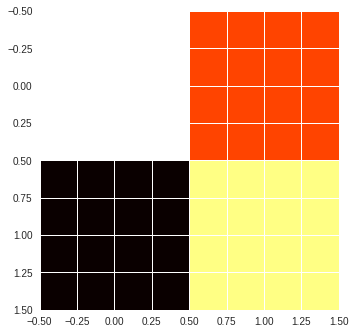

In [10]:
plt.imshow(value_matrix, cmap='hot', interpolation='nearest')
plt.show()